In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='alarm', src=FILE, fpath='../table/alarm/alarm.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.022933006286621094] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "PAP": "categorical",
    "VENTLUNG": "categorical",
    "SAO2": "categorical",
    "EXPCO2": "categorical",
    "HR": "categorical",
    "HREKG": "categorical",
    "CVP": "categorical",
    "KINKEDTUBE": "categorical",
    "BP": "categorical",
    "ERRCAUTER": "categorical",
    "PULMEMBOLUS": "categorical",
    "SHUNT": "categorical",
    "MINVOLSET": "categorical",
    "CATECHOL": "categorical",
    "ERRLOWOUTPUT": "categorical",
    "FIO2": "categorical",
    "LVEDVOLUME": "categorical",
    "INTUBATION": "categorical",
    "STROKEVOLUME": "categorical",
    "PRESS": "categorical",
    "HRBP": "categorical",
    "VENTMACH": "categorical

In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.2768387794494629] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 27 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 27, and the bound is 0.00096935
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 37/37 [00:00<00:00, 163.51it/s]
INFO:profiler.data.transformer:Number of training samples: 37000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[1.7159481048583984] Create Training Data execution time: 1.4391093254089355



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[1.7304341793060303] Learn Structure start

INFO:profiler.learner:use threshold 2.5571
INFO:profiler.utility:[2.343294620513916] Learn Structure execution time: 0.6128604412078857



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[2.3518571853637695] Get Dependencies start

INFO:profiler.utility:[2.5226190090179443] Get Dependencies execution time: 0.1707618236541748



LVEDVOLUME -> PCWP (0.08061103533478582)
LVEDVOLUME -> HYPOVOLEMIA (0.1444768125862695)
LVEDVOLUME -> CVP (0.13788168312652604)
LVFAILURE -> HISTORY (0.024815858616076443)
VENTMACH,DISCONNECT -> VENTTUBE (0.11101625286709749)
VENTMACH -> MINVOLSET (0.07493885114750391)
PVSAT -> VENTALV (0.11703347272314794)
PVSAT,VENTALV -> ARTCO2 (0.07657705021100392)
PVSAT,VENTALV -> VENTLUNG (0.09132714001974991)
VENTALV,VENTLUNG -> MINVOL (0.08941442920776818)
VENTLUNG -> EXPCO2 (0.17912293320719608)
VENTALV -> INTUBATION (0.11961873445971803)
PVSAT -> PULMEMBOLUS (0.013932064582605479)
INTUBATION,PULMEMBOLUS -> SHUNT (0.11006292097000474)
PULMEMBOLUS -> PAP (0.14839674414629445)
PVSAT -> SAO2 (0.05358487907587934)
HR -> HREKG (0.12911725348893424)
HREKG -> ERRCAUTER (0.1424451469197879)
HR,HREKG,ERRCAUTER -> HRSAT (0.06501372256185924)
HR -> ERRLOWOUTPUT (0.08198036042696055)
HR,ERRLOWOUTPUT -> HRBP (0.0564672172617777)
HR -> CO (0.18739261625648695)
CO -> STROKEVOLUME (0.19293201945776084)
HR -> 

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


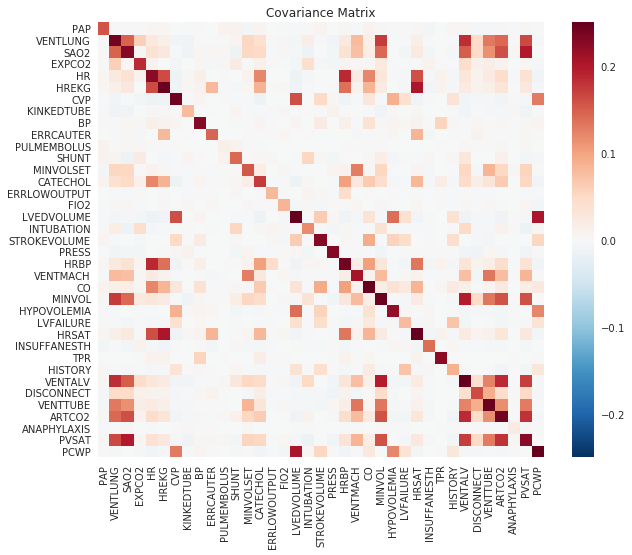

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


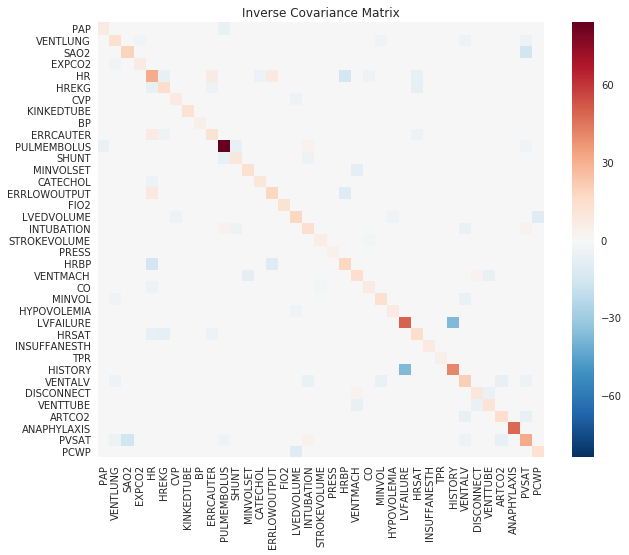

threshold =  74
sum =  [ 5.25341383 15.20712241 16.15616453  2.90130858 52.76255998 17.64367138
  4.81878515  0.          0.         16.50858041 19.63707727 11.07308116
  8.11906589  5.11622129 18.34004595  0.         18.71336527 16.89352547
  2.58435011  0.         25.23965489 18.06981582  6.88319616  9.21012705
  3.67665374 36.96448014 19.09810852  0.          0.         36.96448014
 26.3058932   9.4881959  11.60021881 13.09876112  0.         38.553536
 10.21792638]
attr =  Index(['PAP', 'VENTLUNG', 'SAO2', 'EXPCO2', 'HR', 'HREKG', 'CVP', 'KINKEDTUBE',
       'BP', 'ERRCAUTER', 'PULMEMBOLUS', 'SHUNT', 'MINVOLSET', 'CATECHOL',
       'ERRLOWOUTPUT', 'FIO2', 'LVEDVOLUME', 'INTUBATION', 'STROKEVOLUME',
       'PRESS', 'HRBP', 'VENTMACH', 'CO', 'MINVOL', 'HYPOVOLEMIA', 'LVFAILURE',
       'HRSAT', 'INSUFFANESTH', 'TPR', 'HISTORY', 'VENTALV', 'DISCONNECT',
       'VENTTUBE', 'ARTCO2', 'ANAPHYLAXIS', 'PVSAT', 'PCWP'],
      dtype='object')
Attr w/o dependency: 
 Index([['PAP'], ['VENTLUNG'

In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


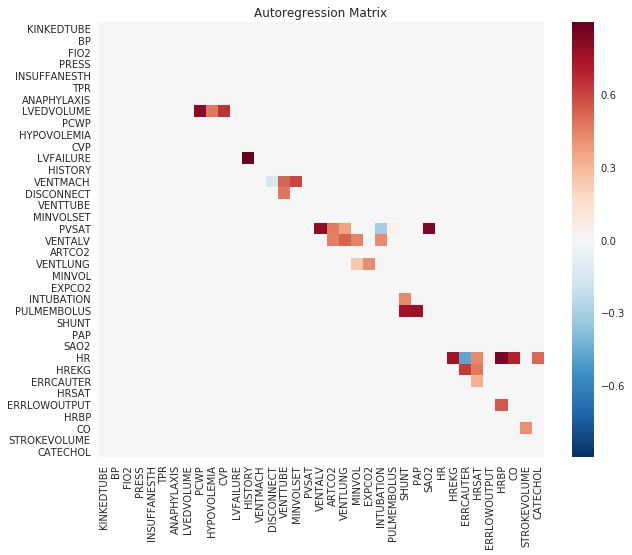

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.022933,start: Load Data,0.000000
1,0.268060,end: Load Data,0.245127
2,0.276839,start: Create Training Data,0.000000
3,1.715948,end: Create Training Data,1.439109
4,1.730434,start: Learn Structure,0.000000
5,2.343295,end: Learn Structure,0.612860
6,2.351857,start: Get Dependencies,0.000000
7,2.522619,end: Get Dependencies,0.170762
8,2.522619,total_execution_time,2.467859


In [11]:
pf.session.timer.to_csv()